## Imports

In [1]:
from ragas.testset import TestsetGenerator

import os
import openai

from openai import OpenAI

client = OpenAI()

/opt/anaconda3/envs/ragas/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from llama_index import download_loader, SimpleDirectoryReader


In [3]:
import matplotlib.pyplot as plt

## Assessing current state of test date generation

In [63]:
!pwd

/Users/shahules/belar/experimental


In [27]:

ArxivReader = download_loader("ArxivReader")

loader = ArxivReader() #uses simpledirectory reader under the hood, hence need modification to laod pages properly

In [31]:
# documents = loader.load_data("retrieval augmented generation AND large language model",max_results=20,papers_dir='./arxiv-papers')

In [4]:
reader = SimpleDirectoryReader("./arxiv-papers/",num_files_limit=10)
documents = reader.load_data()

## SimpleDirectoryReader?

In [5]:
len(documents)

131

In [6]:
# print(documents[14].get_metadata_str())
# print("CONTENT")
# print(documents[14].get_content())
# print(len(documents[14].get_content().split(' ')))

(array([ 5.,  3.,  6., 13., 28., 21., 39., 10.,  5.,  1.]),
 array([  10. ,  113.1,  216.2,  319.3,  422.4,  525.5,  628.6,  731.7,
         834.8,  937.9, 1041. ]),
 <BarContainer object of 10 artists>)

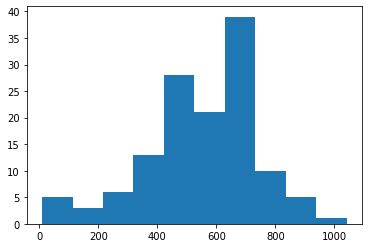

In [7]:
plt.hist([len(doc.get_content().split()) for doc in documents])

In [5]:
test_dist =  {
    "simple": 0.4,
    "reasoning": 0.3,
    "multi_context": 0.0,
    "conditional": 0.3,
}

In [6]:
testsetgenerator = TestsetGenerator.from_default(testset_distribution=test_dist,chunk_size=712)


In [9]:
!pwd

/Users/shahules/belar/experimental


In [8]:
test_size = 25
testset = testsetgenerator.generate(documents, test_size=test_size)
test_df = testset.to_pandas()
test_df.head()


  0%|                                                            | 0/25 [00:00<?, ?it/s]

Len of text chunks 816
seed question What is the effect of retrieval on the use of trivial heuristics by human annotators in counterfactual edits?
{'reason': "The specific study or context for 'retrieval', 'trivial heuristics', 'human annotators', and 'counterfactual edits' is not provided.", 'verdict': 'No'}
rewritten question What are the qualitative differences between counterfactual edits made by humans when they are shown retrieved data vs. when they are not?
Len of text chunks 750
seed question What is the purpose of the GPT-3 Editor module?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



  4%|██                                                  | 1/25 [00:37<15:01, 37.55s/it]

Len of text chunks 779
seed question What is the purpose of using native dialog prompts in the experimental setup?
{'reason': 'The specific experiment or study being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the purpose of using native dialog prompts in the experimental setup of the study?
Len of text chunks 704
Len of text chunks 0
Len of text chunks 1075
seed question What is the purpose of using reflection tokens in SELF-RAG?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



 12%|██████▏                                             | 3/25 [01:25<10:04, 27.47s/it]

Len of text chunks 767
seed question What are the impacts of different retrievers on top of LLaMA2-70B?
{'reason': "The specific context or field of study related to 'LLaMA2-70B' and 'retrievers' is not mentioned in the question.", 'verdict': 'No'}
rewritten question What are the impacts of Dragon, Contriever, and OpenAI embeddings on top of LLaMA2-70B?
Len of text chunks 1007
seed question What is the purpose of the CORE framework in generating counterfactual perturbations?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



 24%|████████████▍                                       | 6/25 [02:15<06:37, 20.92s/it]

Len of text chunks 926
seed question What is the methodology used in the pipeline framework called Rewrite-Retrieve-Read?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The specific pipeline framework or study being referred to is not mentioned in the question.', 'verdict': 'No'}
Len of text chunks 582
seed question What is the maximum token length for the 13B model during training?
{'reason': 'The specific model or system being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the maximum token length for the 13B model during training in the Mdata creation procedure?
Len of text chunks 1058
seed question What is the proposed framework for retrieval augmentation in this paper?
{'reason': 'The specific paper being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the proposed framework for retrieval augmentation in the Rewrite-Retrieve-Read paper?
Len of text


 40%|████████████████████▍                              | 10/25 [03:34<05:03, 20.26s/it]

Len of text chunks 675
seed question What is the purpose of the query rewriting step in the Rewrite-Retrieve-Read pipeline?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



 60%|██████████████████████████████▌                    | 15/25 [04:09<02:17, 13.79s/it]

Len of text chunks 700
seed question What is the accuracy of the reward model in predicting GPT-4 judgments?
{'reason': 'The specific reward model being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the accuracy of the reward model in predicting GPT-4 judgments in the study mentioned in the context?
Len of text chunks 722
seed question What are the F1 bands for the large models in the cluster with golden evidence?
{'reason': 'The specific models and cluster being referred to are not mentioned in the question.', 'verdict': 'No'}
rewritten question What are the F1 bands for the large models in the cluster with golden evidence?
Len of text chunks 957
seed question What is the average document length for the QASP dataset?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The specific table being referred to is not mentioned in the question.', 'verdict': 'No'}
Len of text chunks 1004
seed question What 


 84%|██████████████████████████████████████████▊        | 21/25 [05:21<00:51, 12.92s/it]

Len of text chunks 517
seed question What are the two solutions being studied in this work and how do they compare in terms of performance and computation?
{'reason': 'The specific work being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What are the two solutions being studied in the work "Retrieval Meets Long Context Large Language Models" and how do they compare in terms of performance and computation?
Len of text chunks 684
Len of text chunks 708
seed question What is the purpose of the query rewriting step in the Rewrite-Retrieve-Read pipeline?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



28it [05:45,  8.85s/it]                                                                 

Len of text chunks 937
seed question What is the hit ratio for the LLM rewriter on AmbigNQ?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': "The specific retrieval method and 'AmbigNQ' are not clearly defined or commonly known.", 'verdict': 'No'}
Len of text chunks 558
seed question What is the purpose of using native dialog prompts for response generation?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': "The specific context or study regarding 'native dialog prompts' and 'PaLM's response generation' is not provided in the question.", 'verdict': 'No'}
Len of text chunks 682
Len of text chunks 723
Len of text chunks 898
seed question What is the average QM score for the LLaMA2-70B model with a sequence length of 32k?
{'reason': 'The specific context or field of the LLaMA2-70B model is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the average QM score for the LLaMA2-70B 


36it [08:30, 13.69s/it]

Len of text chunks 392
Len of text chunks 918
seed question What datasets were used in the study?
{'reason': 'The specific study being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What datasets were used for the zero-shot evaluations in the study on integrating long context information for generative QA or summarization tasks via retrieval or LLM's own self-attention mechanism?
Len of text chunks 504
seed question What is the purpose of RAG-assisted Representative Vector Summarization (RVS)?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



45it [09:17, 10.31s/it]

Len of text chunks 520
Len of text chunks 551
seed question What are the impacts of different retrievers on the performance of LLaMA2-70B?
{'reason': "The specific context or field of 'LLaMA2-70B' and 'retrievers' is not mentioned in the question.", 'verdict': 'No'}
rewritten question What are the impacts of different retrievers on the performance of LLaMA2-70B?
Len of text chunks 742
seed question What is the purpose of the crowd-sourcing study mentioned in Section 5.3?
{'reason': 'The specific study or document containing Section 5.3 is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the purpose of the crowd-sourcing study mentioned in Section 5.3 of the paper?
Len of text chunks 882
seed question What is the MAP value for LameR in the TREC Deep Learning 2019 dataset?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



55it [10:06,  8.23s/it]

Len of text chunks 485
Len of text chunks 878
Len of text chunks 729
Len of text chunks 731
seed question What is the nDCG@10 achieved by LameR on DL19?
{'reason': "The specific context or meaning of 'nDCG@10', 'LameR', and 'DL19' is not provided in the question.", 'verdict': 'No'}
rewritten question What is the nDCG@10 achieved by LameR on DL19?
Len of text chunks 1056
Len of text chunks 805
seed question What tasks are the CORE counterfactuals generated for?
{'reason': "The specific context or subject related to 'CORE counterfactuals' is not mentioned in the question.", 'verdict': 'No'}
rewritten question What tasks are the CORE counterfactuals generated for in the study?
Len of text chunks 939
seed question What are the demerits of using a self-supervised retriever in combination with a versatile LLM in the retrieval pipeline?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': "The specific pilot experiments and the terms 'self-supervised ret


66it [11:31,  8.05s/it]

Len of text chunks 1075
seed question What are the four types of reflection tokens used in SELF-RAG?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



78it [11:56,  5.83s/it]

Len of text chunks 717
Len of text chunks 622
Len of text chunks 950
seed question What is the maximum new token length set for closed-set tasks in the ALCE paper?
{'reason': 'The specific paper being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the maximum new token length set for closed-set tasks in the ALCE paper?
Len of text chunks 735
seed question What is the sensibleness prompt alignment in Table 1?
{'reason': 'The specific table or context is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the sensibleness prompt alignment in Table 1 of the paper?
Len of text chunks 863
Len of text chunks 413
Len of text chunks 729
Len of text chunks 754
Len of text chunks 602
seed question What is the difference between global tradeoff and local tradeoff in the context of model re-ranking?
{'reason': "The terms 'global tradeoff' and 'local tradeoff' in model re-ranking are not universally understood and may require spe


91it [13:08,  5.72s/it]

Len of text chunks 894
seed question What is the impact of CF-DPR counterfactuals on encouraging humans to make diverse counterfactual perturbations to text?
{'reason': "The specific context or study involving 'CF-DPR counterfactuals' is not provided in the question.", 'verdict': 'No'}
rewritten question What is the impact of CF-DPR counterfactuals on encouraging humans to make diverse counterfactual perturbations to text in the CORE framework?
Len of text chunks 809
Len of text chunks 293
seed question What is the purpose of the CORE framework?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



105it [13:37,  4.41s/it]

Len of text chunks 685
Len of text chunks 662
seed question What are some potential constraints that could result in local tradeoffs in the context of model decoding strategies?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



120it [13:58,  3.35s/it]

Len of text chunks 431
Len of text chunks 539
seed question What is the purpose of re-ranking or input-level ensembling in the experiments?
{'reason': 'The specific experiments being referred to are not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the purpose of re-ranking or input-level ensembling in the experiments described in the context?
Len of text chunks 0
Len of text chunks 818
seed question What are the optional modules provided by RETA-LLM?
{'reason': 'The specific meaning or function of RETA-LLM is not provided in the question.', 'verdict': 'No'}
rewritten question What are the optional modules provided by RETA-LLM?
Len of text chunks 622
Len of text chunks 752
Len of text chunks 673
seed question What is the score improvement for LLaMA2-70B in HotpotQA when the sequence length increases from 4k to 16k?
{'reason': 'The specific context or study where LLaMA2-70B was used in HotpotQA is not mentioned in the question.', 'verdict': 'No'}
rewritten que

seed question What is the answer recall of generated documents at iteration 3 for the HotpotQA dataset with ITRG (refresh)?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The specific study or experiment being referred to is not mentioned in the question.', 'verdict': 'No'}
Len of text chunks 927
seed question What are the optional modules provided by RETA-LLM?
{'reason': 'The specific context or definition of RETA-LLM is not provided in the question.', 'verdict': 'No'}
rewritten question What are the optional modules provided by RETA-LLM in the RETA-LLM toolkit?
Len of text chunks 615
seed question What is the implementation process for the rewriter in the frozen pipeline?
{'reason': "The specific 'rewriter' and 'frozen pipeline' being referred to are not mentioned in the question.", 'verdict': 'No'}
rewritten question What is the implementation process for the rewriter in the frozen pipeline in the context of the expectation of the reward


136it [19:22,  9.28s/it]

Len of text chunks 783
Len of text chunks 769
seed question What is the premise and hypothesis in the MNLI task?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



153it [20:05,  6.92s/it]

Len of text chunks 737
Len of text chunks 916
seed question What are the evaluation metrics for LaMP-4Task?
{'reason': "The specific context or field of 'LaMP-4Task' is not mentioned in the question.", 'verdict': 'No'}
rewritten question What are the evaluation metrics for LaMP-4Task in the 'Integrating Summarization and Retrieval for Enhanced Personalization via Large Language Models Conference’17' paper?
Len of text chunks 695
seed question What is the workflow implemented in docGPT for summarization?
{'reason': 'The specific workflow or process being referred to is not clear in the question.', 'verdict': 'No'}
rewritten question What is the workflow implemented in docGPT for summarization in the RVS program?
Len of text chunks 623
seed question What is the impact of human annotators being primed with retrieval on the use of trivial heuristics in counterfactual edits?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear wi


171it [20:59,  5.57s/it]

Len of text chunks 0
Len of text chunks 883


sequence item 0: expected str instance, ReadTimeoutError found


seed question What is the goal of the proposed method of integrating summarization and retrieval in the context of language model personalization?
{'reason': 'The specific method or paper being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the goal of the proposed method of integrating summarization and retrieval in the context of language model personalization in the Conference'17 paper?
Len of text chunks 1028
seed question What is the purpose of the ablation studies conducted on the three datasets?
{'reason': 'The specific ablation studies and datasets being referred to are not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the purpose of the ablation studies conducted on the three datasets in the context of the paper 'Exploring Zero-Shot Learning in Neural Networks'?
Len of text chunks 400
seed question What is the purpose of RAG-assisted Representative Vector Summarization (RVS)?
{'reason': 'The question is cl


190it [21:31,  4.24s/it]

Len of text chunks 1034
seed question What dataset is used for the experiments in this work?
{'reason': 'The specific work being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What dataset is used for the experiments in the QReCC dataset?
Len of text chunks 727
Len of text chunks 929
seed question What are the two types of computer memory?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



210it [22:03,  3.34s/it]

Len of text chunks 688
Len of text chunks 1017
seed question What is the effect of changing the weighting term for ISSUP on the citation precision of the models?
{'reason': "The specific models and the term 'ISSUP' are not explained in the question.", 'verdict': 'No'}
rewritten question What is the effect of changing the weighting term for ISSUP on the citation precision of the models in the Preprint paper?
Len of text chunks 1028
seed question What is the purpose of the SELF-RAG framework?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}
{'reason': "The terms 'SELF-RAG' and 'LLM' are not explained or defined in the question.", 'verdict': 'No'}
Len of text chunks 932
seed question What is the impact of CF-DPR counterfactuals on encouraging humans to make diverse counterfactual perturbations to text?
{'reason': "The specific context or study involving 'CF-DPR counterfactuals' is not mentioned in the question.", 'verdict': 'No'}
rewritten question What is 


231it [23:15,  3.37s/it]

Len of text chunks 904
seed question What is the nDCG@10 score for LameR GPT-4 in DL20?
{'reason': "The specific context or meaning of 'DL20' and 'LameR GPT-4' is not provided in the question.", 'verdict': 'No'}
rewritten question What is the nDCG@10 score for LameR GPT-4 in DL20?
Len of text chunks 615
seed question What is the role of the President of India according to India's constitution?
{'reason': 'The question is clear without additional context', 'verdict': 'Yes'}



253it [23:34,  2.54s/it]

Len of text chunks 899
seed question What are some potential constraints that could result in local tradeoff in the context of model re-ranking?
{'reason': 'The specific model or context for re-ranking is not mentioned in the question.', 'verdict': 'No'}
rewritten question What are some potential constraints that could result in local tradeoff in the context of model re-ranking in the study?
Len of text chunks 331
seed question What is the focus of this work on query rewriting for retrieval-augmented large language models?
{'reason': 'The specific work being referred to is not mentioned in the question.', 'verdict': 'No'}
rewritten question What is the focus of the work on query rewriting for retrieval-augmented large language models in the paper "Query Rewriting for Retrieval-Augmented Large Language Models"?
Len of text chunks 786
seed question What are the references mentioned in the document?
{'reason': 'The specific document being referred to is not mentioned in the question.', 'v


276it [26:36,  4.34s/it]

Len of text chunks 998
seed question What are the baselines used in the experiments?
{'reason': 'The specific experiments being referred to are not mentioned in the question.', 'verdict': 'No'}
rewritten question What are the baselines used in the experiments conducted in the Preprint?
Len of text chunks 910
Len of text chunks 927
seed question What is the accuracy of reward predictions for the base LM Llama2-7B in terms of ISUSE?
{'reason': "The terms 'base LM Llama2-7B' and 'ISUSE' are not commonly known or understood without specific context or explanation.", 'verdict': 'No'}
rewritten question What is the accuracy of reward predictions for the base LM Llama2-7B in terms of ISUSE in the preprint?
Len of text chunks 505
seed question What is the impact of limited context size on the number of books loaned in January?
{'reason': "The question is not clear without additional context. It's not clear how 'limited context size' relates to 'number of books loaned in January'.", 'verdict': 


KeyboardInterrupt



In [ ]:
test_df.to_csv("arxiv_retrieval_v1.csv")

**Observations**
- Conditional question evol is working
- reasoning/multi context are not working as expected
- Almost all questions are closed endeded 
- Almost all questions start with "What"

## Experiments

In [32]:
from llama_index.readers.file.markdown_reader import MarkdownReader
from llama_index.schema import Document
from typing import List, Dict, Optional
from pathlib import Path
import re
import os

In [87]:
class RagasMdReader(MarkdownReader):
    
    @staticmethod
    def get_file_metadata(path):
        
        return {"filename":os.path.basename(path),
                "dirname":os.path.dirname(path)}
        
    
    def get_local_metadata(self, text):
        
#         hyperlinks = {}
#         pattern = r"\[(.*?)\]\((?!https)(.*?)\)"
#         for k,v in re.findall(pattern, text):
#             if 'http' not in v and len(k.split())<=3 and v.split('/')[-1].startswith('#'):
#                 hyperlinks[k] = v
#         return hyperlinks
        return_dict = {}
        pattern = r'---\s*title:\s*(.+?)(?:\s*description:\s*"(.*?)")?\s*---'
        match = re.findall(pattern, text)
        if match:
            title,desc = match[0]
            return_dict['title'] = title
            return_dict['description'] = desc if desc else None
            
        return return_dict

        
    
        
    
    def load_data(
        self, file: Path, extra_info: Optional[Dict] = None
    ) -> List[Document]:
        """Parse file into string."""
        
        with open(file, "r", encoding="utf-8") as f:
            content = f.read()
        if self._remove_hyperlinks:
            content = self.remove_hyperlinks(content)
        if self._remove_images:
            content = self.remove_images(content)
            
        local_metadata = self.get_local_metadata(content)

        extra_info = dict(extra_info,**local_metadata) if local_metadata else {}
        return [Document(text=text,metadata=extra_info)]
        
        


In [88]:
md_reader = RagasMdReader(remove_hyperlinks=False)

In [10]:
def llm2(prompt, **kwargs):
    response = client.chat.completions.create(
        model=kwargs.get("model", "gpt-3.5-turbo"),
        messages=[{"role": "system", "content": prompt}],
        temperature=kwargs.get("temperature", 0),
        top_p=kwargs.get("top_p", 1),
        frequency_penalty=kwargs.get("frequency_penalty", 0.0),
        presence_penalty=kwargs.get("presence_penalty", 0.0),
        max_tokens=kwargs.get("max_tokens", 500),
        n=kwargs.get("n", 1),
    )
    return response

In [6]:
from ragas.testset.prompts import SEED_QUESTION, EVOLUTION_ELIMINATION, REWRITE_QUESTION

In [91]:
dirs = [
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/leadership/",
    "/Users/shahules/Myprojects/rag-experiments/gitlab-handbook/data/handbook/company/",
]
documents = []
for dir_path in dirs:
    loader = SimpleDirectoryReader(dir_path, 
                                   recursive=True,
                                  file_extractor={".md":md_reader},
                                file_metadata=RagasMdReader.get_file_metadata)
    
    documents.extend(loader.load_data())

In [101]:
print(documents[14].metadata['title'])

Understanding SOCIAL STYLES


In [78]:
import re

# Sample text
text = """
---
title: "Ask Me Anything"
description: "Learn and ask questions at GitLab's Ask Me Anything (AMA) meetings"
---
"""

# Regular expression to capture title and description
pattern_optional_description = '---\s*title:\s*(.+?)(?:\s*description:\s*"(.*?)")?\s*---'

# Finding matches
matches = re.match(pattern_optional_description, text)

matches


In [79]:
matches is None

True

In [72]:
pattern = re.compile('---\s*title:\s*(.+?)(?:\s*description:\s*"(.*?)")?\s*---')
[m.groupdict() for m in pattern.finditer(text)]

[{}]

In [68]:
text = """
---
title: "Book clubs"
---

From time to time, we run internal book clubs on a book from one of our resource lists. All are welcome! However,
each club has a suggested audience to indicate roles to which the content is tailored.

- [Leadership]({{< ref "_index.md#books" >}})
- [Development](https://about.gitlab.com/handbook/engineering/development/#books)
"""

In [60]:
pattern_optional_description = r'---\s*title:\s*"(.+?)"\s*---'
re.findall(pattern,text)

[]

In [39]:
len(documents)

168

In [13]:
# documents[0].metadata

In [5]:
testset = testsetgenerator.generate(documents, test_size=50)


In [13]:
testset.to_pandas().to_csv("gitlab_communication_company_v2.csv")

In [4]:
# testset.to_pandas()

In [20]:
q1="How should I use my notification settings in Slack?"
q2="What's the best way to manage Slack notification settings for efficient communication and minimal disruptions?"


In [21]:
prompt = EVOLUTION_ELIMINATION.prompt.template.format(question1=q1, question2=q2)

## Create multi context
- find similar docs using metadata 


In [116]:
from langchain.embeddings import OpenAIEmbeddings
from llama_index.indices.query.embedding_utils import get_top_k_embeddings

In [103]:
model = OpenAIEmbeddings()

In [112]:
titles = [doc.metadata.get('title').strip('"') for doc in documents if doc.metadata]

In [114]:
embeddings = model.embed_documents(titles)

In [170]:
k=24

In [171]:
scores, indices = get_top_k_embeddings(embeddings[k],embeddings,similarity_cutoff=0.8)

In [172]:
print(f"Seach query :{titles[k]}\n Results: [{[titles[i] for i in indices[:5]]}")

Seach query :Top Cross-Functional Initiatives
 Results: [['Top Cross-Functional Initiatives', 'Building High Performing Teams', 'Product Career Development Framework Working Group', 'Leadership', 'Single Codebase Working Group']


## Merge documents based on meta-data

In [13]:
from langchain.prompts import HumanMessagePromptTemplate


In [14]:
REWRITE_QUESTION = HumanMessagePromptTemplate.from_template("""
Rewrite the given question so that it can be answered without context.

Question: When was he born?
Context : Albert Einstein was a German-born theoretical physicist who is widely held to be one of the greatest and most influential scientists of all time. He was born on 14 March 1879.
Rewritten question: When was Albert Einstein born? 

Context: A clothes iron (also flatiron, smoothing iron, or simply iron) is a small appliance that, when heated, is used to press clothes to remove wrinkles and unwanted creases. Domestic irons generally range in operating temperature from between 121 °C (250 °F) to 182 °C (360 °F). It is named for the metal (iron) of which the device was historically made, and the use of it is generally called ironing, the final step in the process of laundering clothes.
Question: What is temperate range of the device?
Rewritten question: What is temperate range of clothes iron?


Question:{question}
Context: {context}
Rewritten question:
""")

QUERY =  HumanMessagePromptTemplate.from_template("""
Rewrite the question using given context so that it can be read and answered without any extra information.

Question:{question}
Context: {context}
""")

text = """
The Mona Lisa, painted by Leonardo da Vinci in the early 16th century, is one of the most famous and valuable paintings in the world.
Known for its enigmatic expression and innovative use of sfumato, the painting has become a symbol of Renaissance art.
The Mona Lisa is displayed in the Louvre Museum in Paris and attracts millions of visitors annually.
"""

In [15]:
def get_content(indices):
    
    return '\n'.join([documents[idx].get_content() for idx in indices])

In [26]:
# documents[50]

In [29]:
response = llm2(SEED_QUESTION.format(context=get_content([49,50])).content)

In [30]:
q = response.choices[0].message.content
q

'What is the purpose of the GPT-3 Editor in the CORE framework?'

In [82]:
print(QUERY.format(question=q, context=get_content([12,13,14])).content)
print('Rewritten question: How does the size of the training data affect the performance of the SELF-RAG model according to the experiment results?')


Rewrite the question using given context so that it can be read and answered without any extra information.

Question:What is the impact of training data size on the model's performance?
Context: Preprint.
Table 2: Overall experiment results on six tasks. Bold numbers indicate the best performance among
non-proprietary models, and gray-colored bold text indicates the best proprietary model when
they outperforms all non-proprietary models.∗indicates concurrent or recent results reported by
concurrent work. – indicates numbers that are not reported by the original papers or are not applicable.
Models are sorted based on scale. FS, em, rg, mau, prec, rec denote FactScore (factuality); str-em,
rouge (correctness); MAUVE (fluency); citation precision and recall, respectively.
Short-form Closed-set Long-form generations (with citations)
PopQA TQA Pub ARC Bio ASQA
LM (acc) (acc) (acc) (acc) (FS) (em) (rg) (mau) (pre) (rec)
LMs with proprietary data
Llama2-c 13B 20.0 59.3 49.4 38.4 55.9 22.4 

In [79]:
len(get_content([12,13,14]).split())

1909

In [45]:
print(get_content([14]))

Stimuli BMS [41] Pan et al. [29] Salicon [15] ML-Net [9] Ours Ground Truth
Figure 3: Qualitative performance comparison .
SateliteJumbledSocial
OutdoorNaturalArt
InvertedFractalObjectCartoon
OutdoorManMadeIndoorActionPatternNoisy
Affective
BlackWhiteRandom
LowResolutionLineDrawingSketchSketchLineDrawingLowResolutionRandomBlackWhiteAffectiveNoisyPatternActionIndoorOutdoorManMadeCartoonObjectFractalInvertedArtOutdoorNaturalSocialJumbledSatelite
0.00.20.40.60.81.0
Figure 4: Classiﬁcation confusion matrix .
bias. Location bias is an important component of human
visual attention, and so should be included in any model.
Table 2 shows the results of the 5-fold cross validation
tests on the CAT2000 dataset. We achieve the best perfor-
mance of the tested models. Table 3 shows the performance
on the held out test images. Our model achieves the second
best performance behind the DeepFix model [22]. Com-
pared with DeepFix our network is shallower with less pa-
rameters. The DeepFix model is not 

In [69]:
from llama_index.node_parser.simple import SimpleNodeParser
node_parser = SimpleNodeParser.from_defaults(
            chunk_size=1000, chunk_overlap=0, include_metadata=True
        )

In [70]:
nodes = node_parser.get_nodes_from_documents(
            documents=documents
        )

In [83]:
nodes[1].metadata

{'page_label': '2',
 'file_name': '00891b5a3dbbe4dae6b06432c3f335f8.pdf',
 'file_path': 'arxiv-papers/00891b5a3dbbe4dae6b06432c3f335f8.pdf',
 'creation_date': '2023-11-14',
 'last_modified_date': '2023-11-14',
 'last_accessed_date': '2023-11-14'}

In [84]:
x = [1,2,3,4,5]

In [91]:
x[0:2]

[1, 2]